In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.9.16


# Generate Data
First, let's generate some data. We will sample  𝑥
  randomly between  0
  and  1
 , and let  𝑦
  be sampled as:  𝑦=3𝑥+4+𝜖
 , where  𝜖∼𝑁(0,0.01)
  is noise sampled from a Gaussian random variable of mean  0
  and standard deviation  0.01
 .

In [ ]:
N = 40
X = np.random.rand(N, 1) # Sample N points randomly along X-axis
X = np.hstack((X, np.ones((N, 1))))  # Add a constant dimension
w = np.array([3, 4]) # defining a linear function
y = X @ w + (np.random.randn(N) * 0.1) # defining labels

# Visualize Data
Now, run the code below to visualize the data, which will roughly lie on a line.

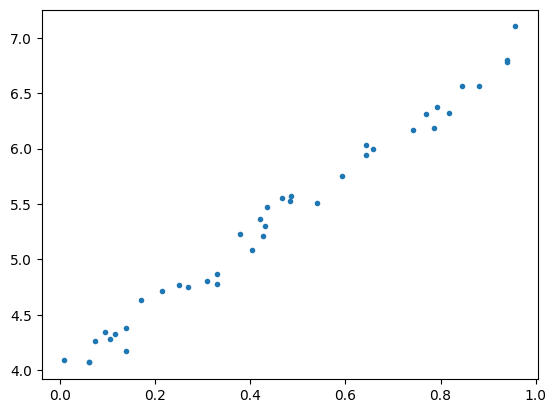

In [ ]:
plt.plot(X[:, 0], y, '.')
plt.show()

# Learning Using Closed Form Solution
Recall the closed form solution when  𝐗
  is a  𝑛×𝑑
  matrix with each data point as a row:

# 𝐰=(𝐗^(𝑇)𝐗)^(−1)*𝐗^(𝑇)𝐲

In [ ]:
w_closed = np.linalg.inv(X.T @ X) @ (X.T @ y)

Quick quiz:

There are two ways for calculating the closed form solution. Which one is more time-efficient?

(np.linalg.inv(X.T @ X) @ X.T) @ y
np.linalg.inv(X.T @ X) @ (X.T @ y)
You will find the answer later in the notebook, but do take a break and think how the order of operations affects efficiency!

Visualize Closed Form Solution
You can visualize the closed form solution with a line that is drawn over your data, using this code:

In [ ]:
def plot_linear(X, y, w):
    plt.plot(X[:, 0], y, '.') # plot the points
    z = np.array([[0,1],      # define two points with X-value 0 and 1 (and constant dimension)
                  [1,1]])
    plt.plot(z[:, 0], z @ w, 'r') # draw line w_closed through these two points
    plt.show()

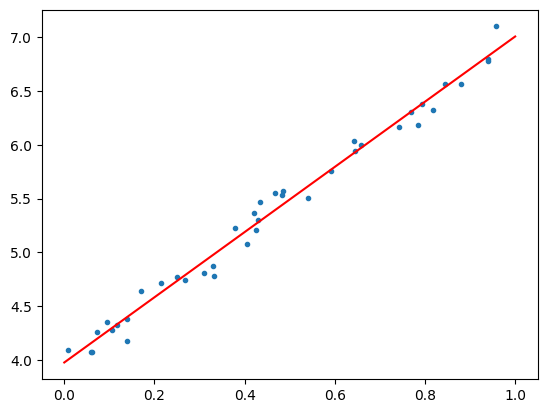

In [ ]:
plot_linear(X, y, w_closed)

# Pro-Tip: NumPy Linear Matrix Solver
Computing matrix inverses can be numerically unstable and slow. Instead, one can use the Numpy linear matrix solver to solve the following linear system:
(𝐗𝑇𝐗)𝐰=𝐗𝑇𝐲

The solution is the same, but it is typically faster and more stable in case  (𝐗𝑇𝐗)
  is not invertible.

> Indented block



In [ ]:
w_closed_np = np.linalg.solve(X.T @ X, X.T @ y)

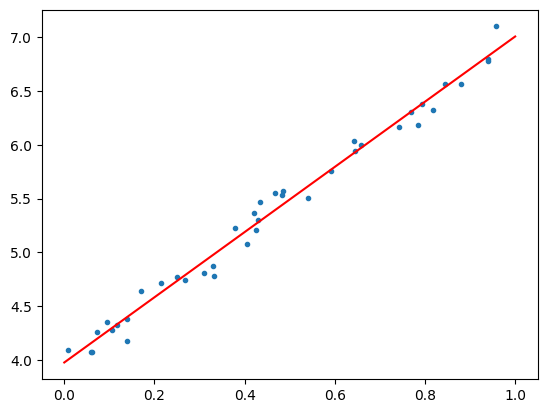

In [ ]:
plot_linear(X, y, w_closed_np)

# Scikit-learn approach
Scikit-learn (or sklearn) is a Python library with implementations for numerous machine learning and data science models. Scikit-learn provides a standard step-by-step training procedure across different machine learning models, simplifying model training and prediction. The typical process for selecting, training, and predicting with a model of your choice is as follows:

Define the classifier clf using a call to the model class.
Train clf using clf.fit on training data.
Predict on test data using clf.predict, getting predictions as output.
Scikit-learn provides a linear regression solver, which is demonstrated below.

In [ ]:
from sklearn.linear_model import LinearRegression

# Set parameter to False since intercept is already included in X (constant dim)
clf = LinearRegression(fit_intercept=False)
clf.fit(X, y)
w_sklearn = clf.coef_

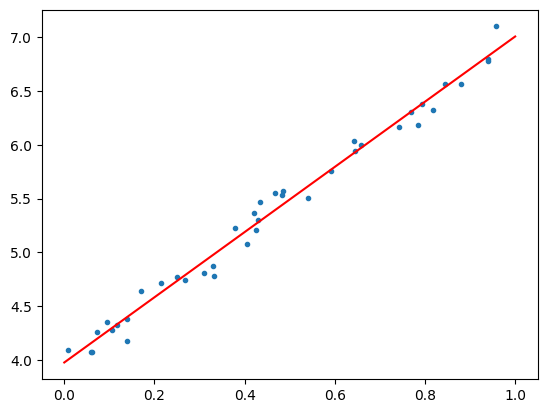

In [ ]:
plot_linear(X, y, w_sklearn)

# Answer to quiz:
(2. np.linalg.inv(X.T @ X) @ (X.T @ y)) is more efficient than (1. (np.linalg.inv(X.T @ X) @ X.T) @ y). This is because (2.) performs 1 matrix-matrix multiplication ( 𝑑2𝑛
  calculations), 1 inverse solve ( 𝑑3
  calculations), and 2 matrix-vector multiplications ( 2𝑑𝑛
  calculations); whereas (1.) performs 2 matrix-matrix multiplications ( 2𝑑2𝑛
  calculations), 1 inverse solve ( 𝑑3
  calculations), and 1 matrix-vector multiplications ( 𝑑𝑛
  calculations).

Add those up and you end up comparing (2.)  𝑑2𝑛+𝑑3+2𝑑𝑛
  and (1.)  2𝑑2𝑛+𝑑3+𝑑𝑛
  calculations -- the former is smaller since  𝑑𝑛≤𝑑2𝑛
 .